In [7]:
import pandas
import array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [2]:
#plot condusion matrix
def plot_confusion_matrix2(cm_input, title='Normalized Confusion Matrix'):
    labels=['phishing','legitimate']
    cm = cm_input.astype('float') / cm_input.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.text(-0.15,0.05, '%.3f' %cm[0][0],fontsize=14,color = 'w')
    plt.text(0.8,0.05, '%.3f' %cm[0][1],fontsize=14,color = 'k')
    plt.text(-0.15,1.05, '%.3f' %cm[1][0],fontsize=14,color = 'k')
    plt.text(0.8,1.05, '%.3f' %cm[1][1],fontsize=14,color = 'w')
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=2)
    # show confusion matrix
    plt.show()

In [3]:
#loading data
data_X=pandas.read_csv(r"data_X.csv",header = None)
data_y=pandas.read_csv(r"data_y.csv",header = None)

#Balancing data
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(data_X, data_y)

#reshaping data
X_res=X_res.values
y_res=y_res.values.ravel()

#split test and train data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [35]:
plist=[]
for i in range(5):
    b = np.random.dirichlet(np.ones(22), size=1)
    b.sort()
    b = np.around(b, 4).tolist()
    b = b[0]
    b = b
    plist.append(b)
plist.append(None)

Accuracy: 0.8853029795781721


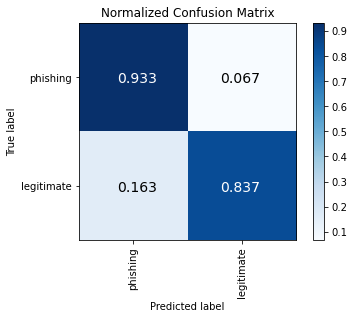

{'priors': None, 'var_smoothing': 1e-09}


In [39]:
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc=clf.score(X_test, y_test)
print('Accuracy:',acc)
plot_confusion_matrix2(cm)
print(clf.get_params())

In [11]:
'''clf = BernoulliNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc=clf.score(X_test, y_test)
print('Accuracy:',acc)
plot_confusion_matrix2(cm)'''#0.86

"clf = BernoulliNB()\nclf.fit(X_train,y_train)\ny_pred=clf.predict(X_test)\ncm = confusion_matrix(y_test, y_pred)\nacc=clf.score(X_test, y_test)\nprint('Accuracy:',acc)\nplot_confusion_matrix2(cm)"

In [10]:
'''clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc=clf.score(X_test, y_test)
print('Accuracy:',acc)
plot_confusion_matrix2(cm)'''#0.73

"clf = MultinomialNB()\nclf.fit(X_train,y_train)\ny_pred=clf.predict(X_test)\ncm = confusion_matrix(y_test, y_pred)\nacc=clf.score(X_test, y_test)\nprint('Accuracy:',acc)\nplot_confusion_matrix2(cm)"

In [37]:
'''priors=plist
var_smoothing = [1e-9,1e-8,1e-7]
param=dict(priors=priors,var_smoothing=var_smoothing)

model= GaussianNB()
grid_search=GridSearchCV(model,param,n_jobs=-1,verbose=1)
clf_grid=grid_search.fit(X_train,y_train)

pred_test2=clf_grid.predict(X_test)
acc2=accuracy_score(y_test,pred_test2)
accuracy_score(y_test,pred_test2)

print('Parameters: ',clf_grid.best_params_)

accc=accuracy_score(y_test,pred_test2)
print('The best accuracy: ','%.3f'%accc)
cm_best = confusion_matrix(y_test, pred_test2)
plot_confusion_matrix2(cm_best)'''

"priors=plist\nvar_smoothing = [1e-9,1e-8,1e-7]\nparam=dict(priors=priors,var_smoothing=var_smoothing)\n\nmodel= GaussianNB()\ngrid_search=GridSearchCV(model,param,n_jobs=-1,verbose=1)\nclf_grid=grid_search.fit(X_train,y_train)\n\npred_test2=clf_grid.predict(X_test)\nacc2=accuracy_score(y_test,pred_test2)\naccuracy_score(y_test,pred_test2)\n\nprint('Parameters: ',clf_grid.best_params_)\n\naccc=accuracy_score(y_test,pred_test2)\nprint('The best accuracy: ','%.3f'%accc)\ncm_best = confusion_matrix(y_test, pred_test2)\nplot_confusion_matrix2(cm_best)"